## Social Dimensions of Eaton and Palisades Fires
***
Week 8 - Discussion section

### Metadata exploration
***
Variables of Interest

In [108]:
### Loading Packages
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# EJI Data
fp = os.path.join("data", "EJI_2024_California.gdb")
eji_data = gpd.read_file(fp)

# Palisades Fire Boundary
fp = os.path.join("data", "Palisades_Perimeter_20250121.geojson")
palisades = gpd.read_file(fp)

# Eaton Fire Boundary
fp = os.path.join("data", "Eaton_Perimeter_20250121.geojson")
eaton = gpd.read_file(fp)

In [109]:
eji_data.columns

Index(['OBJECTID', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID',
       'GEOID_2020', 'COUNTY', 'StateDesc', 'STATEABBR',
       ...
       'TWOMORE', 'E_TWOMORE', 'OTHERRACE', 'E_OTHERRACE', 'Tribe_PCT_Tract',
       'Tribe_Names', 'Tribe_Flag', 'Shape_Length', 'Shape_Area', 'geometry'],
      dtype='object', length=174)

In [110]:
eji_data = eji_data.to_crs(epsg=4326)

In [112]:
census_palisades = gpd.sjoin(eji_data, palisades, how = 'inner')
census_eaton = gpd.sjoin(eji_data, eaton, how = 'inner')

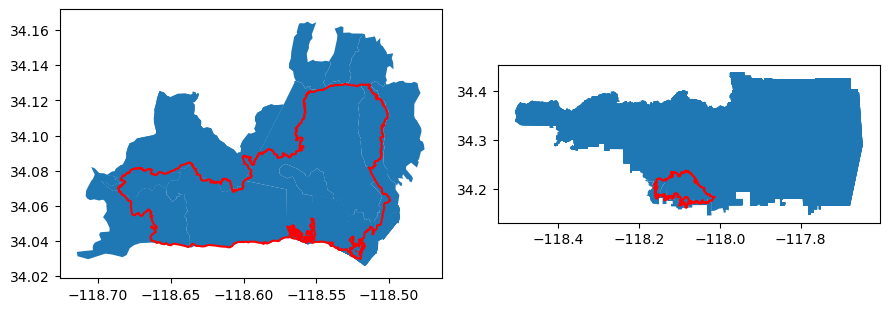

In [68]:
fig, ax = plt.subplots(figsize=(9, 5), nrows = 1, ncols = 2)

# Palisade Fire Perimeter
census_palisades.plot(ax=ax[0])
palisades.boundary.plot(ax=ax[0], color = 'red')

# Census Tracts with Fire
census_eaton.plot(ax=ax[1])
eaton.boundary.plot(ax=ax[1], color = 'red')

plt.tight_layout()
plt.show()

How big is the Palisades fire perimeter in relation to the census tracts.
    It is signifigantly smaller

<Axes: >

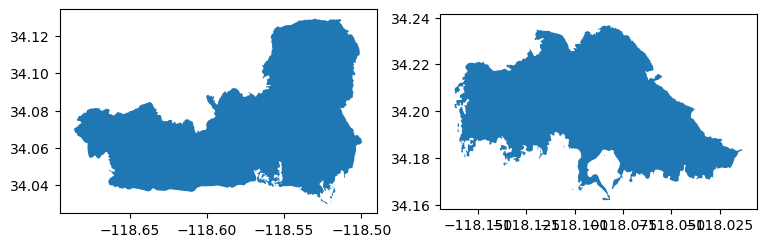

In [103]:
# Clipping
fig, ax = plt.subplots(figsize=(9, 5), nrows = 1, ncols = 2)

palisades_clip = gpd.clip(palisades, eji_data)
palisades_clip.plot(ax=ax[0])

eaton_clip = gpd.clip(eaton, eji_data)
eaton_clip.plot(ax=ax[1])

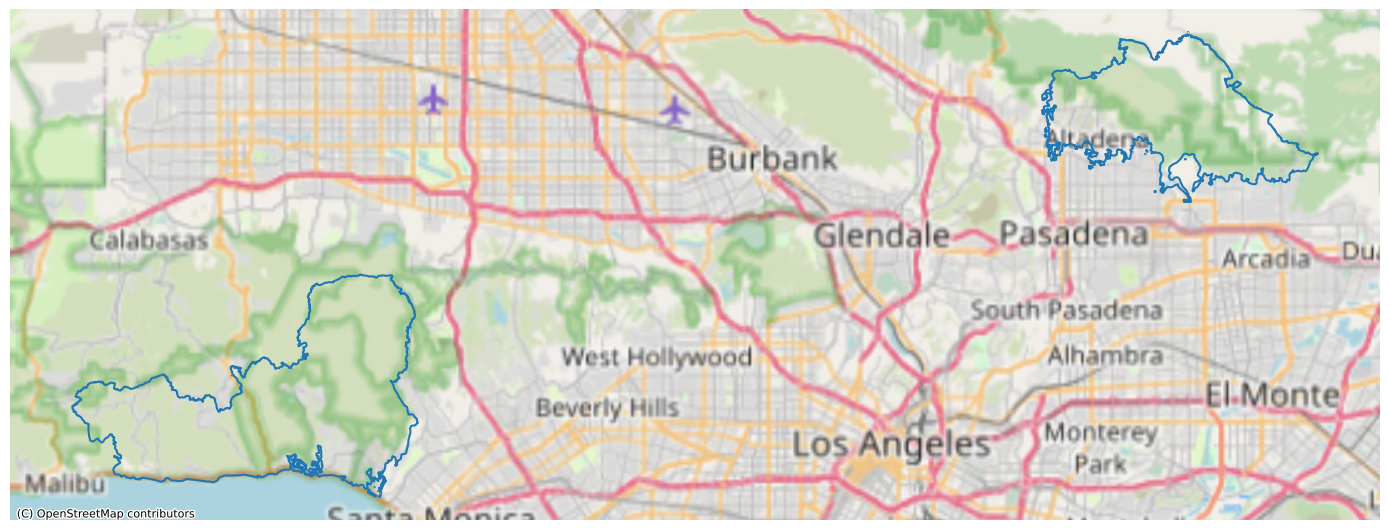

In [105]:
import contextily as ctx

fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Add basemap using contextily
eaton_clip.boundary.plot(ax=ax)
palisades_clip.boundary.plot(ax=ax)

ctx.add_basemap(ax, crs = eaton_clip.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# ADD TITLE

ax.axis('off')

plt.tight_layout()
plt.show()

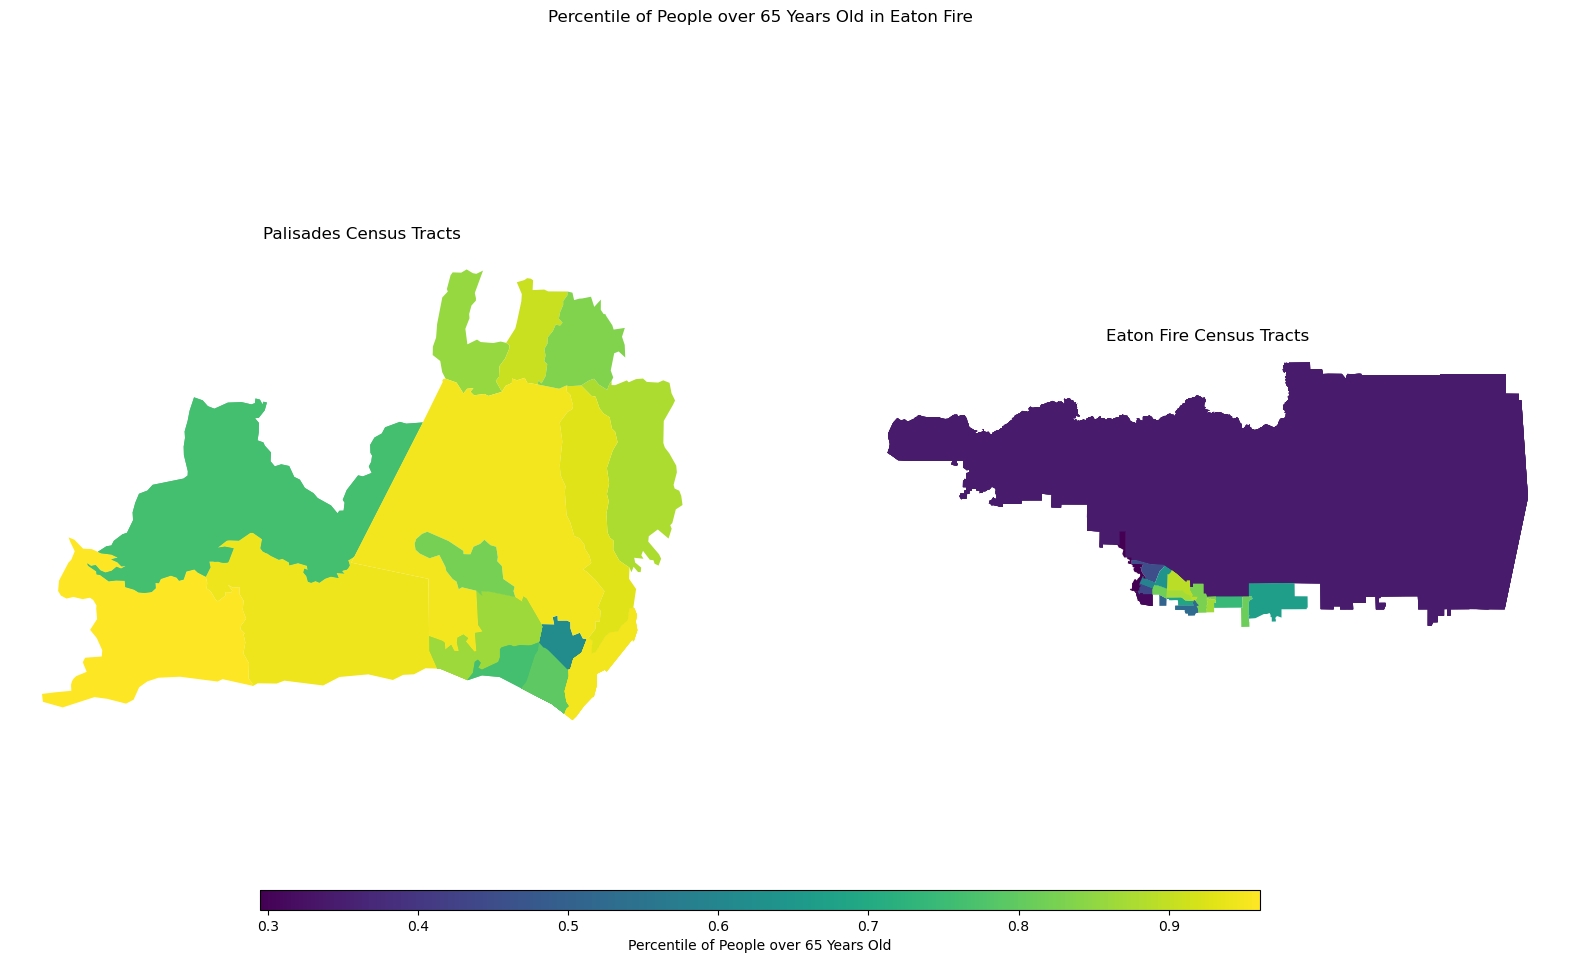

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# UPDATE WITH YOU EJI VARIABLE FROM STEP 1
eji_variable = 'EPL_AGE65'

# Find common min/max for legend range
vmin = min(census_palisades[eji_variable].min(), census_eaton[eji_variable].min())
vmax = max(census_palisades[eji_variable].max(), census_eaton[eji_variable].max())

# Plot census tracts within Palisades perimeter
census_palisades.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
)
ax1.set_title('Palisades Census Tracts')
ax1.axis('off')

# Plot census tracts within Eaton perimeter
census_eaton.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
)
ax2.set_title('Eaton Fire Census Tracts')
ax2.axis('off')

# Add overall title
fig.suptitle('Percentile of People over 65 Years Old in Eaton Fire')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Percentile of People over 65 Years Old')

plt.show()